In [1]:
# %pip install -U qiskit
from qiskit import __version__
print('Qiskit Sürümü: ', __version__)

Qiskit Sürümü:  1.0.2


# <b> Qiskit ile Kuantum Işınlama

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import quantum_info
from qiskit.visualization import plot_bloch_multivector

## <b>Adım 0:</b> Devrenin oluşturulması
3 kübite ve 3 adet bite ihtiyaç var
<br> Alice ışınlamak istediği kübit
<br> Alice dolaşıklık kübiti
<br> Bob dolaşıklık kübiti
<br> 3 kübit ölçümü saklamak için 3 adet klasik bit.

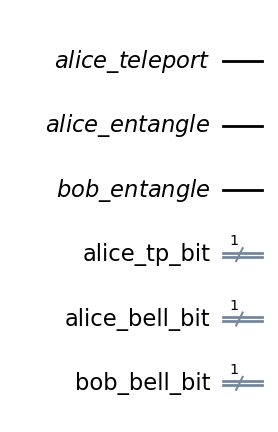

In [3]:
alice_teleport = QuantumRegister(1, name='alice_teleport')
alice_entangle = QuantumRegister(1, name='alice_entangle')
bob_entangle  =  QuantumRegister(1, name='bob_entangle')

alice_teleport_measure = ClassicalRegister(1, name="alice_tp_bit")
alice_entangle_measure = ClassicalRegister(1, name="alice_bell_bit")
bob_entangle_measure   = ClassicalRegister(1, name="bob_bell_bit")

teleportation_circuit = QuantumCircuit(alice_teleport, alice_entangle, bob_entangle,
                                      alice_teleport_measure, alice_entangle_measure,
                                      bob_entangle_measure)
teleportation_circuit.draw(output='mpl')

## Işınlama için rastgele bir kübit durumu seçilir
Bloch küresi üzerinde kübitin durumu incelenebilir

Statevector([-0.48921806+0.36124775j, -0.66672096+0.43086995j],
            dims=(2,))


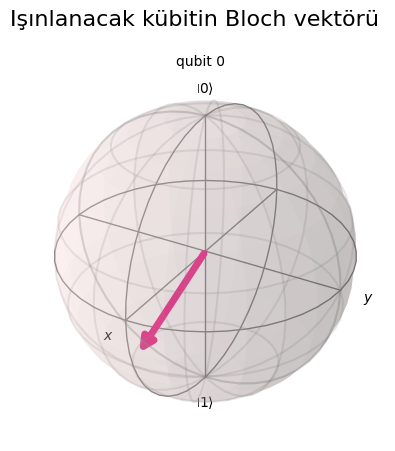

In [4]:
teleport_qubit_state = quantum_info.random_statevector(2)
print(teleport_qubit_state)
plot_bloch_multivector(teleport_qubit_state, title='Işınlanacak kübitin Bloch vektörü')

## <b>Adım 1</b>: Işınlamak için bir durum hazırlanması ve dolaşıklık kurulması
Alice ile Bob aralarında dolaşıklık kurulur

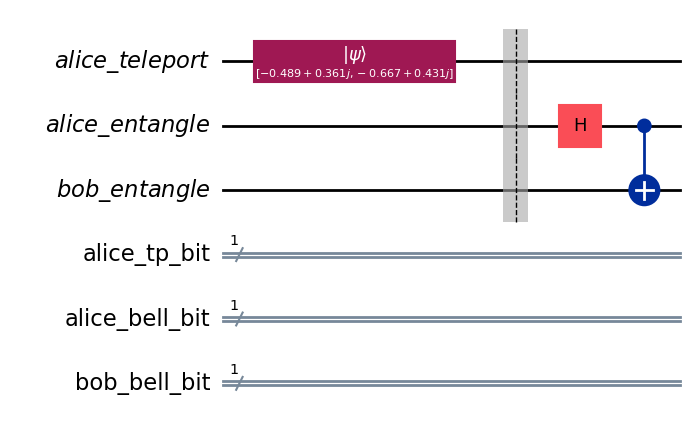

In [5]:
teleportation_circuit.initialize(teleport_qubit_state, [0])
teleportation_circuit.barrier()
teleportation_circuit.h(alice_entangle)
teleportation_circuit.cx(alice_entangle, bob_entangle)
teleportation_circuit.draw(output='mpl')

## <b>Adım 2</b>: Alice kendi kübitlerine CNOT ve H uygulaması

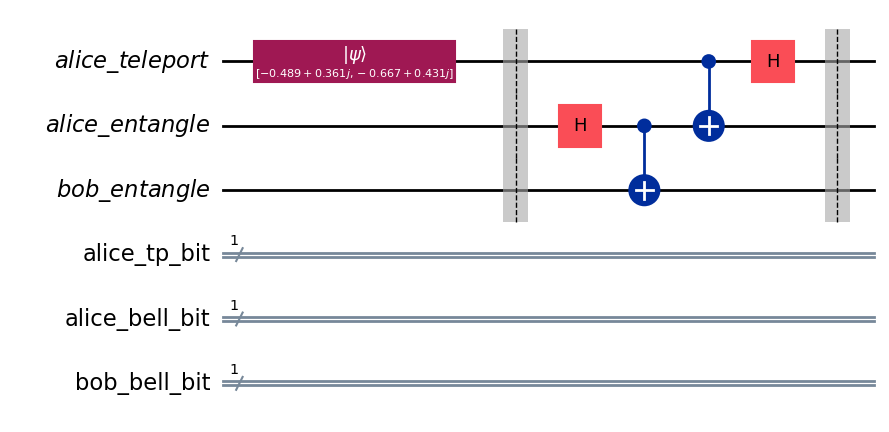

In [6]:
teleportation_circuit.cx(alice_teleport, alice_entangle)
teleportation_circuit.h(alice_teleport)
teleportation_circuit.barrier()
teleportation_circuit.draw(output='mpl')

## <b>Adım 3</b>: Alice kendi kübitlerini ölçmesi ve ölçüm sonuçlarını Bob'a iletmesi

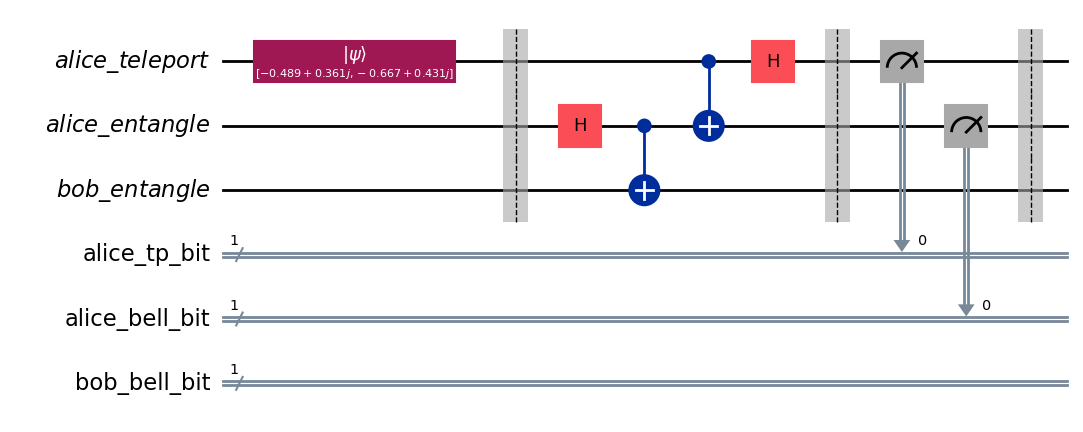

In [7]:
teleportation_circuit.measure(alice_teleport, alice_teleport_measure)
teleportation_circuit.measure(alice_entangle, alice_entangle_measure)
teleportation_circuit.barrier()
teleportation_circuit.draw(output='mpl')

## <b>Adım 4</b>: Bob ölçüm sonuçlarına göre kendi kübitine X ve/veya Z uygulaması
Bu adımda kapıdan sonra <b>c_if()</b> ile klasik kontrollü kapılar eklenebilir.

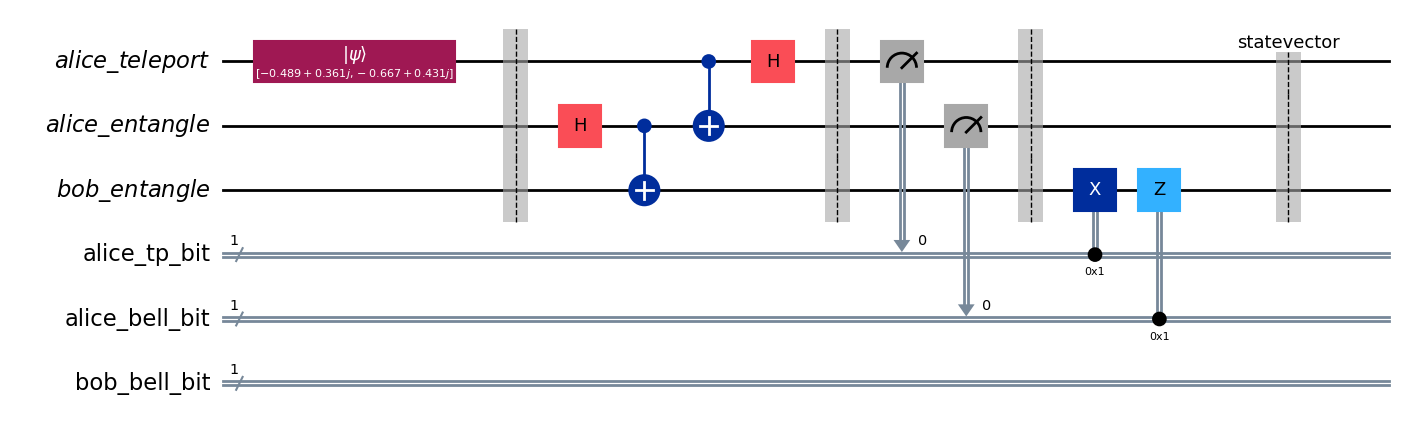

In [8]:
teleportation_circuit.x(bob_entangle).c_if(alice_teleport_measure, 1)
teleportation_circuit.z(bob_entangle).c_if(alice_entangle_measure, 1)
teleportation_circuit.save_statevector()
teleportation_circuit.draw(output='mpl')

## Bob'un elindeki kübitin incelenmesi
Devreyi simüle edip Bob'un elindeki kübitin durumuna bakıldığında üstteki ışınlamak istenilen kübit ile aynı olduğu görülür.

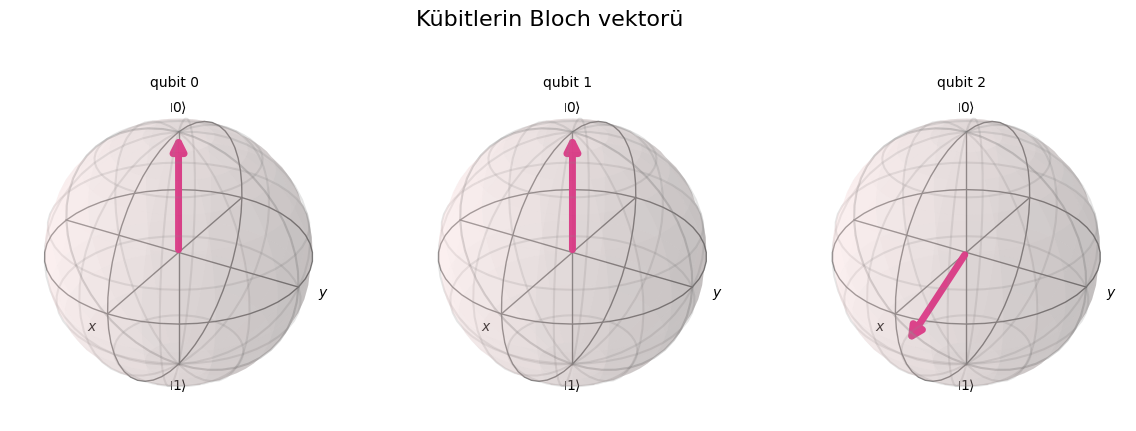

In [9]:
simulator = AerSimulator(method='statevector')
teleportation_circuit = transpile(teleportation_circuit, simulator)
result = simulator.run(teleportation_circuit).result()
statevector = result.get_statevector(teleportation_circuit)
plot_bloch_multivector(statevector, title='Kübitlerin Bloch vektorü')